In [1]:
import sys
import pandas as pd
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes_scale.txt',delimiter=' ')
df.to_csv('/Users/user/Downloads/dscalecsv.csv')
df = pd.read_csv('dscalecsv.csv',usecols=range(1,10),header=None)

df.replace({'1:':''}, regex=True, inplace=True)
df.replace({'2:':''}, regex=True, inplace=True)
df.replace({'3:':''}, regex=True, inplace=True)
df.replace({'4:':''}, regex=True, inplace=True)
df.replace({'5:':''}, regex=True, inplace=True)
df.replace({'6:':''}, regex=True, inplace=True)
df.replace({'7:':''}, regex=True, inplace=True)
df.replace({'8:':''}, regex=True, inplace=True)
df.dropna(axis=0, how='any', inplace=True)

df.reset_index(drop=True, inplace=True)
df.to_csv('/Users/user/Downloads/dscalefinal.csv')

In [3]:
df = pd.read_csv('dscalefinal.csv',usecols=range(2,10))
df['bias']=1
X=df.values.astype(float)
df = pd.read_csv('dscalefinal.csv',usecols=(1,1))
Y = df.values.astype(float)

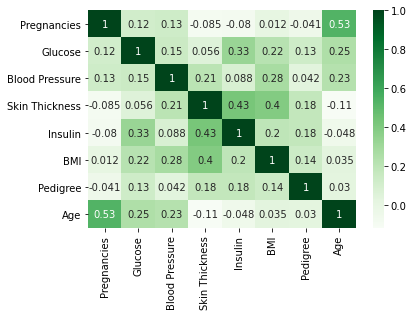

In [4]:
df = pd.read_csv('dscalefinal.csv',usecols=range(2,10))
df.columns = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Pedigree', 'Age']
sns.heatmap(df.corr(),annot=True,cmap = 'Greens')

In [5]:
def activation(x):
    if x>0:
        return 1
    else:
        return -1
adjustments = []

def perceptron_training(x,y,epoch,lr,w):
    for _ in range(epoch):
        for i in range(len(x)):
            sum = np.dot(x[i],w)
            output = activation(sum)
            error = y[i]-output
            adjustments.append(w)
            for j in range(0, len(w)):
                w[j]= w[j]+(lr*error*x[i][j])
    
    return w

def perceptron_testing(x,w):
    predictions = []
    #print(len(x))
    for i in range(len(x-1)):
        sum = np.dot(x[i],w)
        output = activation(sum)
        predictions.append(output)
    return predictions

In [6]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.1, random_state=1, shuffle=True)
w = 2 * np.random.random((len(X_trn[0]),1)) + 1

Initial training with epoch = 1000 and learning rate = 0.1

In [7]:
weights = perceptron_training(X_trn,Y_trn,1000,0.1,w)
#print(weights)
pred_t = perceptron_testing(X_trn,weights)
pred = perceptron_testing(X_tst,weights)
print("Training accuracy: ",accuracy_score(Y_trn, pred_t, normalize=True)*100)
print("Testing accuracy: ",accuracy_score(Y_tst, pred, normalize=True)*100)

Training accuracy:  71.01024890190337
Testing accuracy:  72.36842105263158


Training with epoch = 10000 and learning rate = 0.1

In [8]:
weights = perceptron_training(X_trn,Y_trn,10000,0.1,w)
#print(weights)
pred_t = perceptron_testing(X_trn,weights)
pred = perceptron_testing(X_tst,weights)
print("Training accuracy: ",accuracy_score(Y_trn, pred_t, normalize=True)*100)
print("Testing accuracy: ",accuracy_score(Y_tst, pred, normalize=True)*100)

Training accuracy:  74.23133235724744
Testing accuracy:  72.36842105263158


Training with epoch = 1000 and learning rate = 0.01

In [9]:
weights = perceptron_training(X_trn,Y_trn,1000,0.01,w)
#print(weights)
pred_t = perceptron_testing(X_trn,weights)
pred = perceptron_testing(X_tst,weights)
print("Training accuracy: ",accuracy_score(Y_trn, pred_t, normalize=True)*100)
print("Testing accuracy: ",accuracy_score(Y_tst, pred, normalize=True)*100)

Training accuracy:  75.40263543191801
Testing accuracy:  77.63157894736842


Training with epoch = 10000 and learning rate = 0.01

In [12]:
weights = perceptron_training(X_trn,Y_trn,10000,0.01,w)
#print(weights)
pred_t = perceptron_testing(X_trn,weights)
pred = perceptron_testing(X_tst,weights)
#plt.plot(weights)

In [14]:
print("Training accuracy: ",accuracy_score(Y_trn, pred_t, normalize=True)*100)
print("Testing accuracy: ",accuracy_score(Y_tst, pred, normalize=True)*100)

Training accuracy:  77.89165446559298
Testing accuracy:  82.89473684210526


Applying K-fold split

In [13]:
kf = KFold(n_splits=10,shuffle=True, random_state=1)
kf.split(X)
training_accuracy = []
testing_accuracy = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Train the model
    weights = perceptron_training(X_train, Y_train,1000,0.01,w)
    #print(weights.shape)
    predicts_train = perceptron_testing(X_train,weights)
    predicts_test = perceptron_testing(X_test,weights)
    #print(predcts.shape)
    training_accuracy.append(accuracy_score(Y_train, predicts_train, normalize=True)*100)
    testing_accuracy.append(accuracy_score(Y_test, predicts_test, normalize=True)*100)
print("Average training accuracy of 10-fold: ",np.mean(training_accuracy))
print("Average testing accuracy of 10-fold: ",np.mean(testing_accuracy))

Average training accuracy of 12-fold:  71.65799748272585
Average testing accuracy of 12-fold:  71.40877192982455


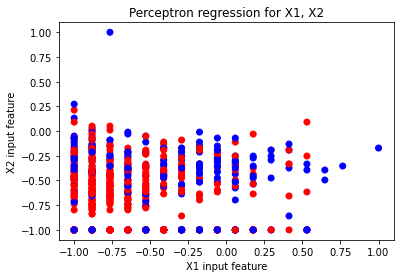

In [15]:
x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]
x4 = X[:, 3]
x5 = X[:, 4]
x6 = X[:, 5]
x7 = X[:, 6]
x8 = X[:, 7]
color = ['red' if value == 1 else 'blue' for value in Y]
plt.scatter(x1, x4, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2')
plt.show()